<a href="https://colab.research.google.com/github/TITAN-Project-EU/PhotoZ_SDSS_ML/blob/main/MLP_PhotoZ_SDSS_R%26C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Direct download link from Zenodo
url = 'https://zenodo.org/records/11073039/files/PhotoZ_SDSS.csv'

# Download and load the dataset
data_raw = pd.read_csv(url)

# Display the first few rows of the dataframe
print(data_raw.head())


                 objid          ra        dec         u         g         r  \
0  1237657877538406672  116.120394  22.545785  24.56870  21.61409  22.12696   
1  1237663783144194772   46.998370  -0.830104  24.07251  20.66000  20.13897   
2  1237680529198940388  332.536372  25.377382  24.63465  22.93031  21.14673   
3  1237663547978744571  130.401203  58.256154  25.49103  23.31337  21.79658   
4  1237662666425827520  246.576703  24.555668  24.63449  18.96386  17.51325   

          i  photometric_z            specObjID      redshift  redshift_error  \
0  21.32540       21.38752  5032798515845419008  1.208629e-07        0.000119   
1  19.84265       19.68270   913172214314985472  1.267802e-07        0.000053   
2  19.94050       20.18146  6708185691363495936  2.121375e-07        0.000059   
3  20.59253       19.47360  9224594267057704960  4.250481e-07        0.000027   
4  16.66019       16.41736  1772187952164661248  4.440446e-07        0.000009   

    class  
0  GALAXY  
1  GALAXY  
2 

In [3]:
data = data_raw[(data_raw['u'] >= 0) & (data_raw['g'] >= 0) & (data_raw['r'] >= 0) & (data_raw['i'] >= 0) & (data_raw['photometric_z'] >= 0)]


# Display the first few rows of the DataFrame to confirm successful loading
print(data.head())


# Display summary statistics of the dataset
print(data.describe())

# Check for any missing values in the dataset
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna(subset=['u', 'g', 'r', 'i', 'photometric_z', 'redshift'])



                 objid          ra        dec         u         g         r  \
0  1237657877538406672  116.120394  22.545785  24.56870  21.61409  22.12696   
1  1237663783144194772   46.998370  -0.830104  24.07251  20.66000  20.13897   
2  1237680529198940388  332.536372  25.377382  24.63465  22.93031  21.14673   
3  1237663547978744571  130.401203  58.256154  25.49103  23.31337  21.79658   
4  1237662666425827520  246.576703  24.555668  24.63449  18.96386  17.51325   

          i  photometric_z            specObjID      redshift  redshift_error  \
0  21.32540       21.38752  5032798515845419008  1.208629e-07        0.000119   
1  19.84265       19.68270   913172214314985472  1.267802e-07        0.000053   
2  19.94050       20.18146  6708185691363495936  2.121375e-07        0.000059   
3  20.59253       19.47360  9224594267057704960  4.250481e-07        0.000027   
4  16.66019       16.41736  1772187952164661248  4.440446e-07        0.000009   

    class  
0  GALAXY  
1  GALAXY  
2 

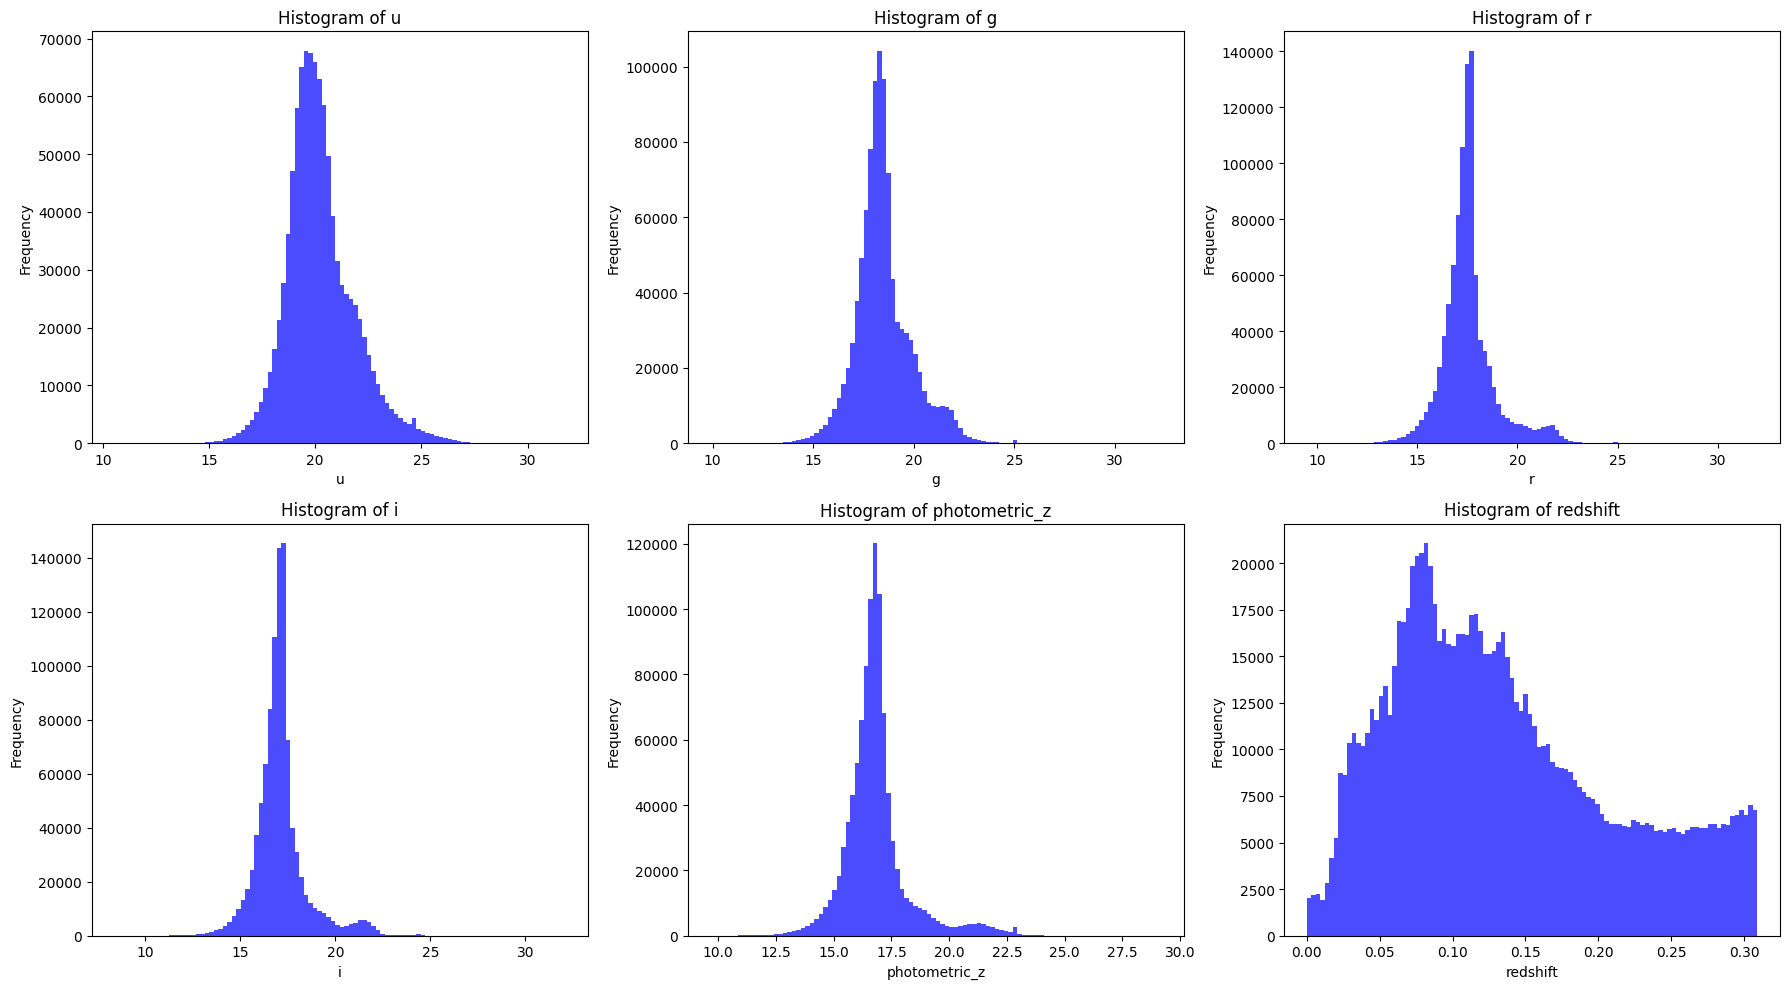

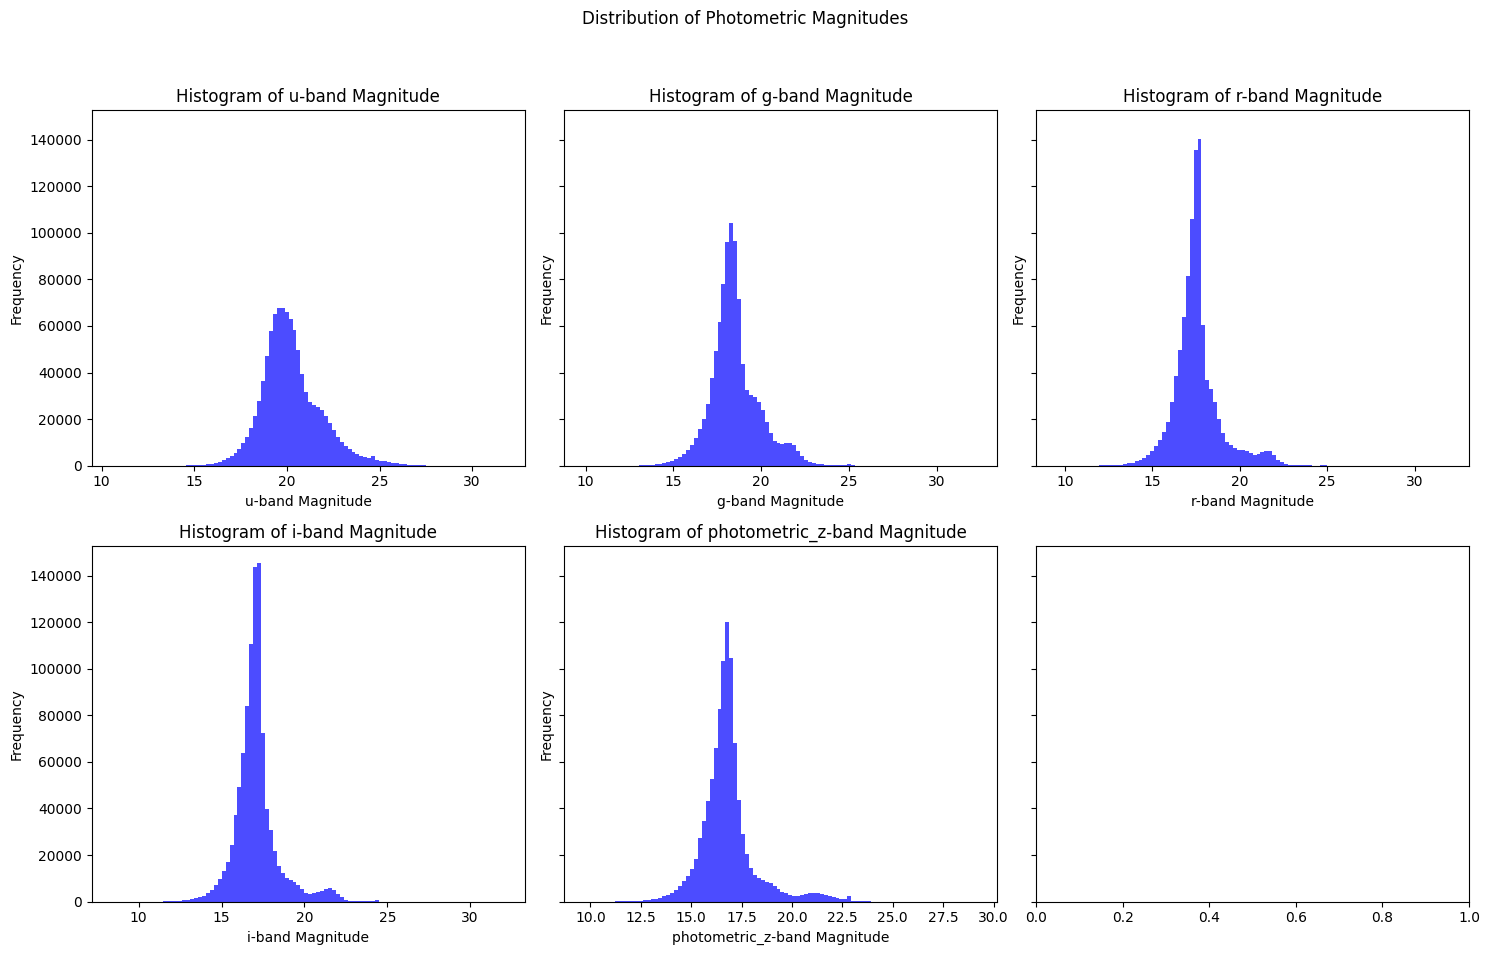

In [4]:

# Plotting the histogram of redshifts

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # Adjust subplot grid if needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

# List of columns to plot
columns = ['u', 'g', 'r', 'i', 'photometric_z', 'redshift']

# Plotting histograms
for ax, column in zip(axes, columns):
    ax.hist(data[column].dropna().to_numpy(), bins=100, color='blue', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



# Plotting histograms for each photometric band
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=True)  # Shared y-axis for better comparison
fig.suptitle('Distribution of Photometric Magnitudes')

photometric_bands = ['u', 'g', 'r', 'i', 'photometric_z']
for ax, band in zip(axes.flatten(), photometric_bands):
    ax.hist(data[band].dropna().to_numpy(), bins=100, color='blue', alpha=0.7)  # Using dropna() to remove any NaN values that might cause issues
    ax.set_title(f'Histogram of {band}-band Magnitude')
    ax.set_xlabel(f'{band}-band Magnitude')
    ax.set_ylabel('Frequency')

# Adjust the layout to not overlap the subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [5]:


# Input
X = data[['u', 'g', 'r', 'i', 'photometric_z']]

# Target
y = data['redshift']



# Split the data - 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)




# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Define the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer: Predicting a single value
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error', 'mean_squared_error'])


# Fit the model on the training data
history = model.fit(X_train_scaled, y_train, batch_size=1024 , epochs=10, validation_split=0.2, verbose=1)

# Save the model if you need to use it later
model.save('my_redshift_model.h5')



Training set size: (799948, 5)
Testing set size: (199987, 5)
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0338 - mean_squared_error: 0.0028 - val_loss: 9.9212e-04 - val_mean_absolute_error: 0.0213 - val_mean_squared_error: 9.9212e-04
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.6601e-04 - mean_absolute_error: 0.0209 - mean_squared_error: 9.6601e-04 - val_loss: 8.8035e-04 - val_mean_absolute_error: 0.0199 - val_mean_squared_error: 8.8035e-04
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.1901e-04 - mean_absolute_error: 0.0204 - mean_squared_error: 9.1901e-04 - val_loss: 8.6898e-04 - val_mean_absolute_error: 0.0198 - val_mean_squared_error: 8.6898e-04
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 8.9423e-04 - mean_absolute_error: 0.0201 - mean_squared_error: 8.9423e-04 - val_loss: 9.0513e-04 - val_mean_absolute_error: 0.0201 - val_mean_squared_error: 9.0513e-04
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 8.9075e-04 - mean_absolute_error: 0.0200 - mean

6250/6250 - 10s - 2ms/step - loss: 8.2239e-04 - mean_absolute_error: 0.0190 - mean_squared_error: 8.2239e-04
Loss (Mean Squared Error): 0.019042035564780235
Mean Absolute Error: 0.0008223860641010106


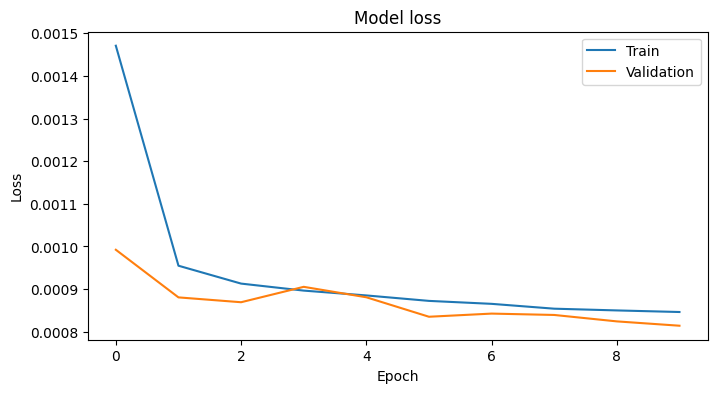

In [6]:

# Evaluate the model on the test set
test_results = model.evaluate(X_test_scaled, y_test, verbose=2)

# Print the loss and mean absolute error
print(f"Loss (Mean Squared Error): {test_results[1]}")
print(f"Mean Absolute Error: {test_results[2]}")

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, InputLayer
from tensorflow.keras.optimizers import Adam

# 1. Bin the redshift into classes (e.g., 0.0–0.01, 0.01–0.02, ..., 1.0+)
n_bins = 20
data['z_bin'], bins = pd.qcut(data['redshift'], q=n_bins, labels=False, retbins=True)

# 2. Prepare data for classification
X_class = data[['u', 'g', 'r', 'i', 'photometric_z']].values
y_class = to_categorical(data['z_bin'])  # One-hot encoded labels

# 3. Train-test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# 4. Normalize inputs
scaler_class = StandardScaler()
X_train_c_scaled = scaler_class.fit_transform(X_train_c)
X_test_c_scaled = scaler_class.transform(X_test_c)

# 5. Define classification MLP model
model_class = Sequential([
    Dense(32, activation='elu', input_shape=(X_train_c_scaled.shape[1],)),
    Dense(64, activation='elu'),
    Dense(n_bins, activation='softmax')  # Output: n_bins classes
])



# 6. Compile with categorical crossentropy
model_class.compile(optimizer=Adam(learning_rate=1e-3),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# 7. Train the model
model_class.fit(X_train_c_scaled, y_train_c, epochs=20, batch_size=1024, validation_split=0.2)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1574 - loss: 2.5310 - val_accuracy: 0.2045 - val_loss: 2.2482
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2120 - loss: 2.2222 - val_accuracy: 0.2327 - val_loss: 2.1453
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2386 - loss: 2.1344 - val_accuracy: 0.2512 - val_loss: 2.0930
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2507 - loss: 2.0859 - val_accuracy: 0.2572 - val_loss: 2.0657
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2582 - loss: 2.0600 - val_accuracy: 0.2642 - val_loss: 2.0450
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2628 - loss: 2.0431 - val_accuracy: 0.2686 - val_loss: 2.0291
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2673 - loss: 2.0224 - val_accuracy: 0.2692 - val_loss: 2.0143
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2713 - loss: 2.0138 - val_accuracy: 0.

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
import numpy as np

# --- Classification Evaluation ---

# Map class index to redshift bin center
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Compute bin centers from bin edges

# Predict class probabilities and get predicted class indices
y_pred_class_probs = model_class.predict(X_test_c_scaled)
y_pred_class_idx = np.argmax(y_pred_class_probs, axis=1)
y_true_class_idx = np.argmax(y_test_c, axis=1)

# # Print classification report
# print("\nClassification Report:")
# print(classification_report(y_true_class_idx, y_pred_class_idx))

# print("Confusion Matrix:")
# print(confusion_matrix(y_true_class_idx, y_pred_class_idx))

# Estimate redshift from classification by mapping to bin centers
predicted_redshifts_from_class = bin_centers[y_pred_class_idx]

# Get true redshifts for the classification test set
test_indices = np.arange(len(y_test_c))  # Safe fallback if indices were lost
true_redshifts = data['redshift'].iloc[y_test_c.index].values if hasattr(y_test_c, 'index') else data['redshift'].iloc[test_indices].values

# Classification errors
mae_class = mean_absolute_error(true_redshifts, predicted_redshifts_from_class)
mse_class = mean_squared_error(true_redshifts, predicted_redshifts_from_class)

# --- Regression Evaluation ---
y_pred_reg = model.predict(X_test_scaled).flatten()  # Ensure it's 1D
# Assumes regression model and predictions are available
# y_pred_reg: regression predictions
# y_test: true redshifts
mae_reg = mean_absolute_error(y_test, y_pred_reg)
mse_reg = mean_squared_error(y_test, y_pred_reg)


print(f"\nClassification Redshift Errors:")
print(f"Mean Absolute Error (Classification): {mae_class:.5f}")
print(f"Mean Squared Error  (Classification): {mse_class:.5f}")

print("\nRegression Redshift Errors:")


print(f"Mean Absolute Error (Regression): {mae_reg:.5f}")
print(f"Mean Squared Error  (Regression): {mse_reg:.5f}")


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

Classification Redshift Errors:
Mean Absolute Error (Classification): 0.09837
Mean Squared Error  (Classification): 0.01559

Regression Redshift Errors:
Mean Absolute Error (Regression): 0.01904
Mean Squared Error  (Regression): 0.00082
